In [48]:
import pandas as pd

df = pd.read_csv('processed_data.csv')
display(df)
print(df.columns)

,HOUSEID,ANNMILES,GASUSGE,HighestEDUC,TAXISERVICE,RIDESHARE22,ESCOOTERUSED,PTUSED,MCTRANSIT,WALKTRANSIT,...,URBAN,URBANSIZE,URBRUR,PPT517,YOUNGCHILD,RESP_CNT,URBRUR_2010,TDAYDATE,WRKCOUNT,STRATUMID
0,9000013002,12000,408.258158,7,0,0,0,0,0,13,...,1,4,1,2,0,4,1,202202,1,1021
1,9000013016,10000,356.835885,6,0,0,0,0,0,7,...,1,2,1,0,0,2,1,202202,2,1021
2,9000013039,5000,171.387563,6,0,0,0,0,0,8,...,1,4,1,2,0,4,1,202201,1,1021
3,9000013041,5000,173.118751,6,0,0,0,0,0,0,...,1,3,1,0,0,1,1,202201,1,1021
4,9000013042,70020,2414.157750,8,0,3,0,8,0,9,...,1,4,1,0,1,2,1,202202,2,1021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7161,9000218006,11000,374.625041,7,0,0,0,0,0,0,...,1,3,1,2,0,3,1,202212,1,1031
7162,9000218013,3000,102.395445,7,0,0,0,0,0,3,...,1,1,1,0,0,2,1,202301,0,1031
7163,9000218021,12100,421.380431,6,0,0,0,0,0,0,...,4,6,2,0,0,1,2,202212,0,1032
7164,9000218034,10000,482.619553,2,0,0,0,0,0,0,...,4,6,2,0,0,2,2,202212,0,1032


Index(['HOUSEID', 'ANNMILES', 'GASUSGE', 'HighestEDUC', 'TAXISERVICE',
       'RIDESHARE22', 'ESCOOTERUSED', 'PTUSED', 'MCTRANSIT', 'WALKTRANSIT',
       'BIKETRANSIT', 'EMPLOYMENT2', 'WTHHFIN', 'WTHHFIN5D', 'WTHHFIN2D',
       'NUMADLT', 'HOMEOWN', 'HOMETYPE', 'RAIL', 'CENSUS_D', 'CENSUS_R',
       'HH_HISP', 'DRVRCNT', 'CNTTDHH', 'CDIVMSAR', 'FLAG100', 'HHFAMINC',
       'HHFAMINC_IMP', 'HH_RACE', 'HHSIZE', 'HHVEHCNT', 'HHRELATD', 'LIF_CYC',
       'MSACAT', 'MSASIZE', 'TRAVDAY', 'URBAN', 'URBANSIZE', 'URBRUR',
       'PPT517', 'YOUNGCHILD', 'RESP_CNT', 'URBRUR_2010', 'TDAYDATE',
       'WRKCOUNT', 'STRATUMID'],
      dtype='object')


In [49]:
df_super = pd.read_csv("processed_data_SuperuserOnly.csv")
df_nonSuper = pd.read_csv("processed_data_nonSuperuserOnly.csv")

In [50]:
numerical = [
            'TAXISERVICE', 'ESCOOTERUSED', 'PTUSED', 'MCTRANSIT', 'WALKTRANSIT',
            'BIKETRANSIT', 'EMPLOYMENT2', 'WTHHFIN', 'WTHHFIN5D', 'WTHHFIN2D',
            'CNTTDHH', 'PPT517', 'YOUNGCHILD', 'RESP_CNT','WRKCOUNT', 'NUMADLT',
            'RIDESHARE22', 'DRVRCNT', 'HHSIZE'
            ]

categorical = [
                'HighestEDUC', 'HOMEOWN', 'HOMETYPE', 'TRAVDAY', 
                'RAIL', 'CENSUS_D', 'CENSUS_R', 'HH_HISP',
                'FLAG100', 'HHFAMINC', 'HHFAMINC_IMP', 'HH_RACE', 'CDIVMSAR', 
                'HHVEHCNT', 'HHRELATD', 'LIF_CYC', 'MSACAT', 'MSASIZE',
                'URBAN', 'URBANSIZE', 'URBRUR', 'URBRUR_2010', 
            ]

MCTRANSIT 0.011317139255562917
WALKTRANSIT 0.03801749768436081
EMPLOYMENT2 1.566523648774104e-20
WTHHFIN 2.4247230271224255e-09
WTHHFIN5D 0.0006470069301208778
WTHHFIN2D 0.0012325988711550055
PPT517 2.7298699101551027e-18
YOUNGCHILD 0.0005979413227050502
RESP_CNT 7.182057279101535e-29
WRKCOUNT 2.0374893574853475e-22
NUMADLT 1.4883396843831319e-16
RIDESHARE22 0.0002915743550749257
DRVRCNT 1.4290990304114895e-21
HHSIZE 7.59589013511768e-30


<BarContainer object of 14 artists>

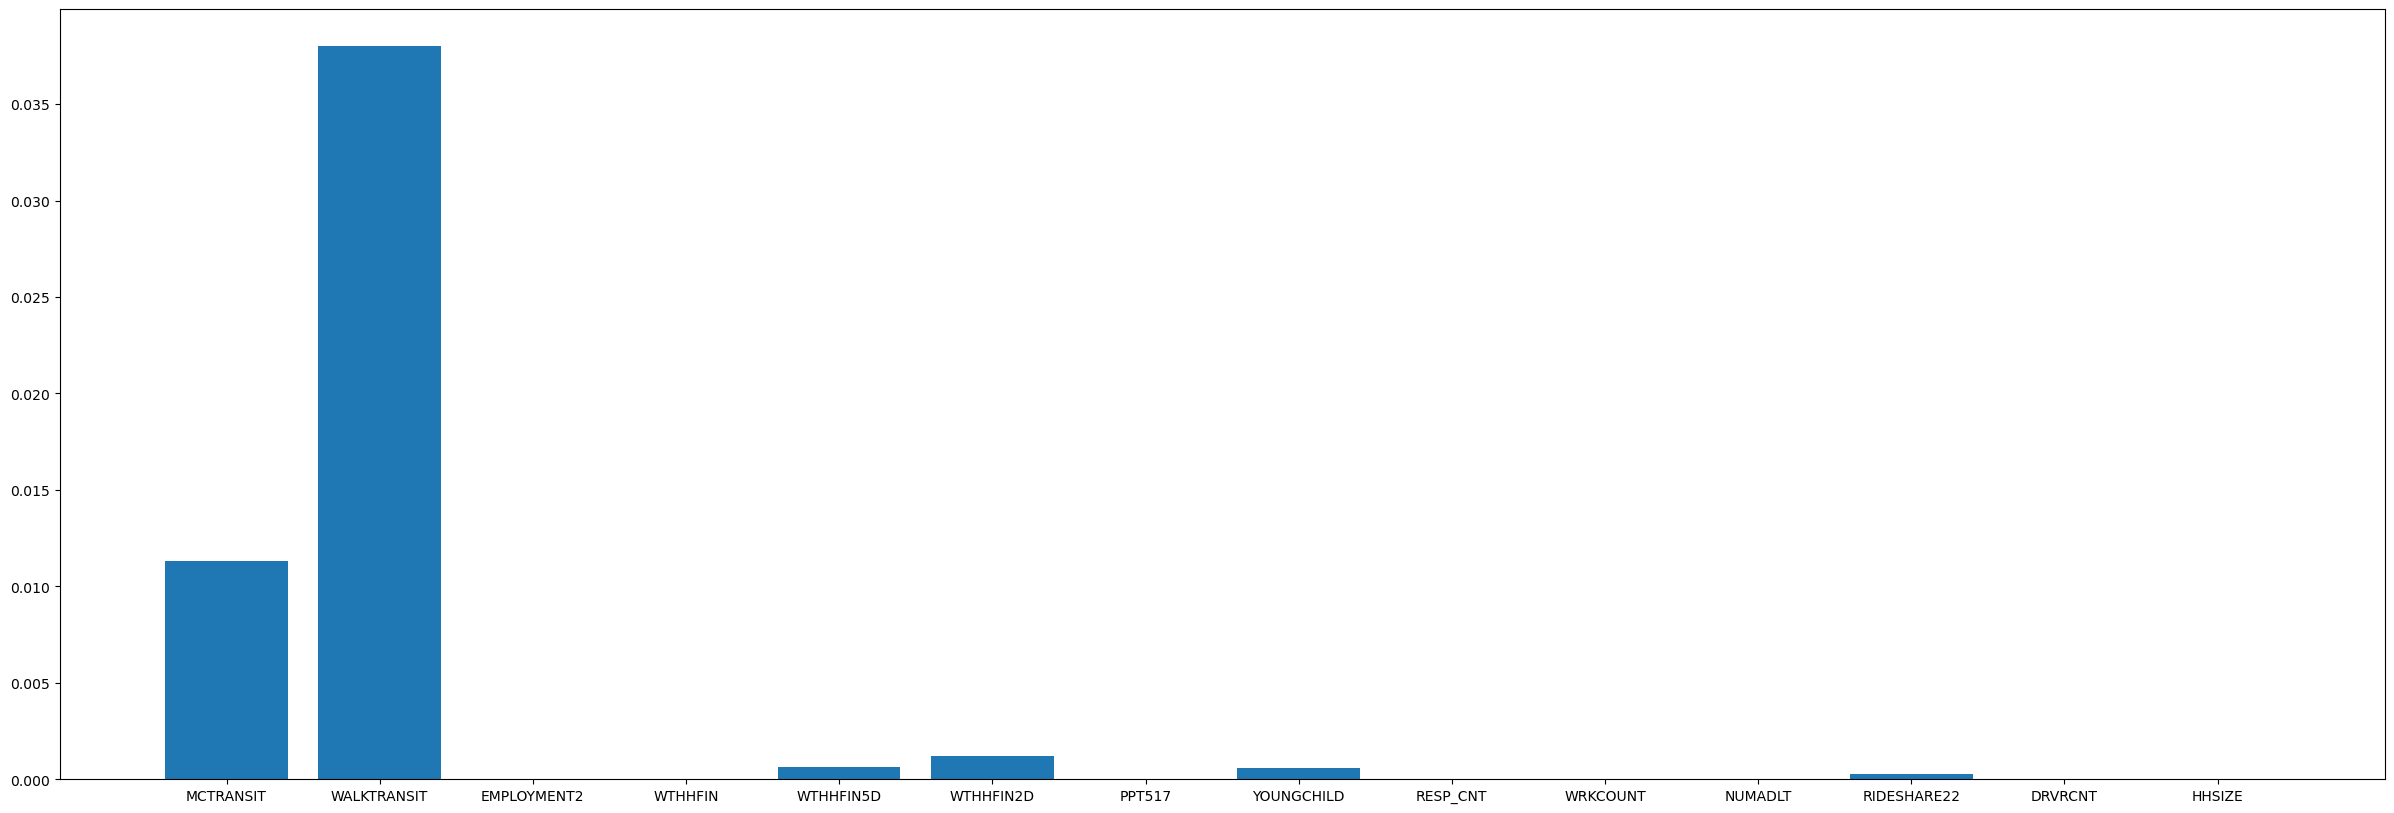

In [59]:
import scipy.stats as stats
import matplotlib.pyplot as plt

ps = []
names = []

for column in numerical:
    stat, p = stats.ttest_ind(df_super[column], df_nonSuper[column])
    if ( p < 0.05):
        ps.append(p)
        names.append(column)
        print(column, p)

plt.figure(figsize=(30,10))
plt.bar(names, ps)

In [62]:
for column in categorical:
    values_super = df_super[column].value_counts()
    freqencies_super = values_super / values_super.sum()
    freqencies_super = freqencies_super.values.tolist()

    values_nonSuper = df_nonSuper[column].value_counts()
    freqencies_nonSuper = values_nonSuper / values_nonSuper.sum()
    freqencies_nonSuper = freqencies_nonSuper.values.tolist()

    try:
        result = stat, pvalue = stats.chisquare(freqencies_super, freqencies_nonSuper)
        print(column)
        display(result)
    except:
        freqencies_super.append(0)
        result = stat, pvalue = stats.chisquare(freqencies_super, freqencies_nonSuper)
        print(column)
        display(result)


HighestEDUC


Power_divergenceResult(statistic=0.03875876609678913, pvalue=0.9999999141970796)

HOMEOWN


Power_divergenceResult(statistic=0.008028625397220653, pvalue=0.9998091312616598)

HOMETYPE


Power_divergenceResult(statistic=0.009282102345535306, pvalue=0.9999892635858357)

TRAVDAY


Power_divergenceResult(statistic=0.00212831443348129, pvalue=0.9999999997993129)

RAIL


Power_divergenceResult(statistic=0.019491873833836187, pvalue=0.8889655308272675)

CENSUS_D


Power_divergenceResult(statistic=0.011141959256154207, pvalue=0.9999999999600442)

CENSUS_R


Power_divergenceResult(statistic=0.02813708011416012, pvalue=0.9987552722775621)

HH_HISP


Power_divergenceResult(statistic=0.04636924200588545, pvalue=0.8295059991488292)

FLAG100


Power_divergenceResult(statistic=0.024976032939896642, pvalue=0.8744267967137445)

HHFAMINC


Power_divergenceResult(statistic=0.03410556129884323, pvalue=0.9999999999999664)

HHFAMINC_IMP


Power_divergenceResult(statistic=0.027621786878695896, pvalue=0.9999999999958606)

HH_RACE


Power_divergenceResult(statistic=0.02344570589475488, pvalue=0.9999997338469525)

CDIVMSAR


Power_divergenceResult(statistic=0.028011099316615468, pvalue=1.0)

HHVEHCNT


Power_divergenceResult(statistic=0.26123076579270843, pvalue=0.999998193694031)

HHRELATD


Power_divergenceResult(statistic=0.025419264231345644, pvalue=0.8733267955548643)

LIF_CYC


Power_divergenceResult(statistic=0.05828548530380202, pvalue=0.9999999977029047)

MSACAT


Power_divergenceResult(statistic=0.03317343829243008, pvalue=0.9984089401262803)

MSASIZE


Power_divergenceResult(statistic=0.03386051011111997, pvalue=0.9999889125052125)

URBAN


Power_divergenceResult(statistic=0.02538527529291803, pvalue=0.9989324539516831)

URBANSIZE


Power_divergenceResult(statistic=0.03879744652728963, pvalue=0.9999844459788375)

URBRUR


Power_divergenceResult(statistic=0.020602605517938348, pvalue=0.8858668205751372)

URBRUR_2010


Power_divergenceResult(statistic=0.011785598365887193, pvalue=0.9135503021085437)